In [ ]:
import numpy as np
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from matplotlib.pyplot import specgram
from keras.layers.convolutional import MaxPooling1D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
RAV = '/content/drive/MyDrive/Projects/RAVDESS/'

In [ ]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
female_fear         96
male_surprise       96
male_fear           96
female_surprise     96
female_disgust      96
male_sad            96
female_sad          96
male_disgust        96
female_angry        96
male_happy          96
female_happy        96
male_angry          96
Name: labels, dtype: int64

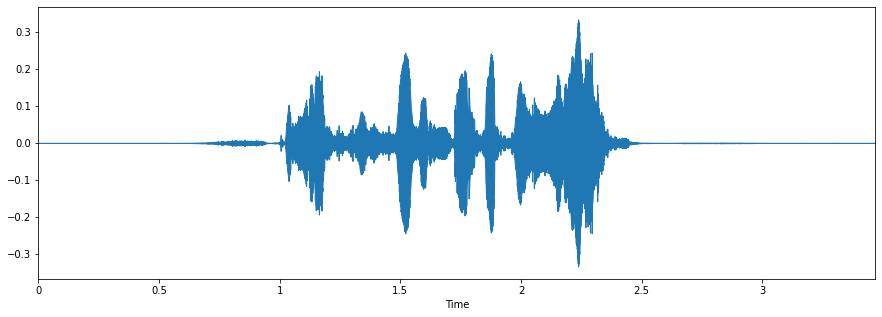

In [ ]:
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

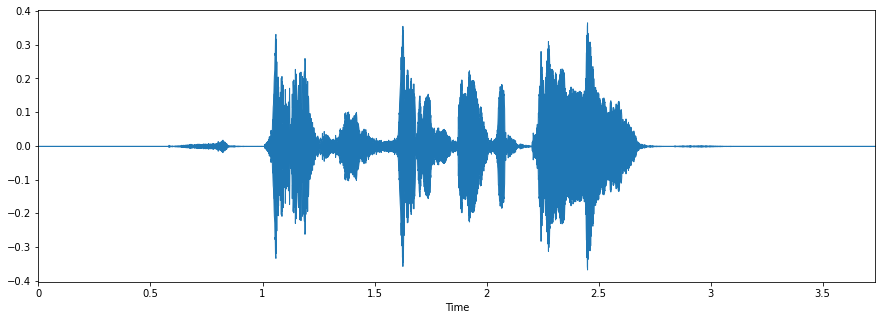

In [ ]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

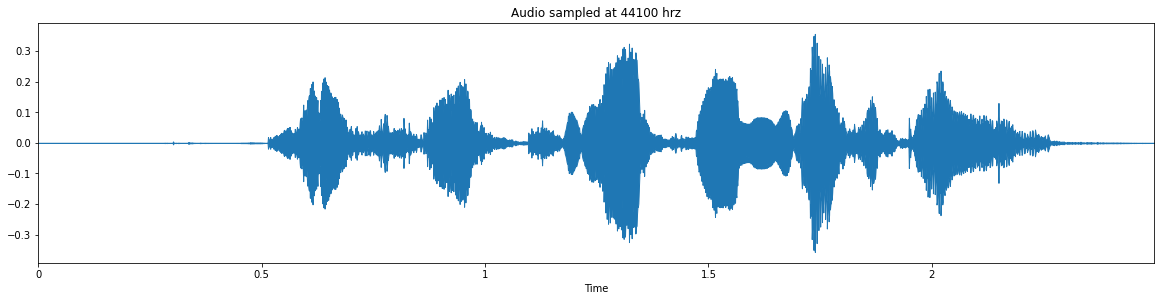

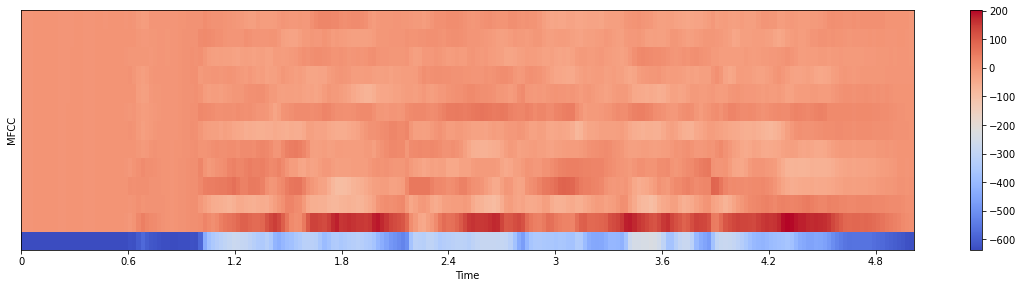

In [ ]:
path = "/content/drive/MyDrive/Projects/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

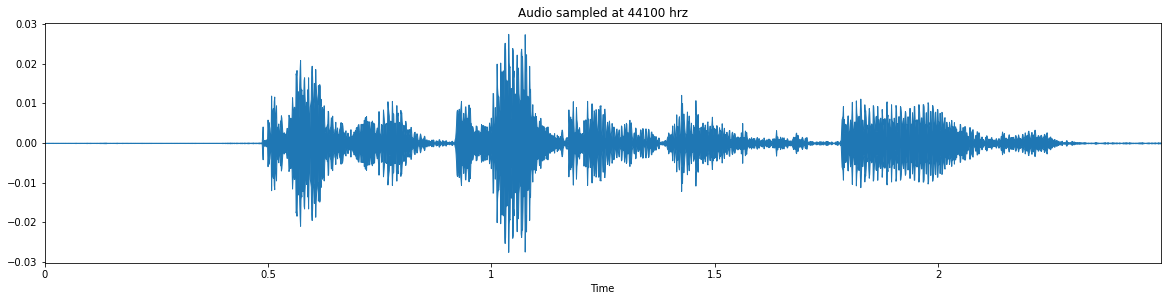

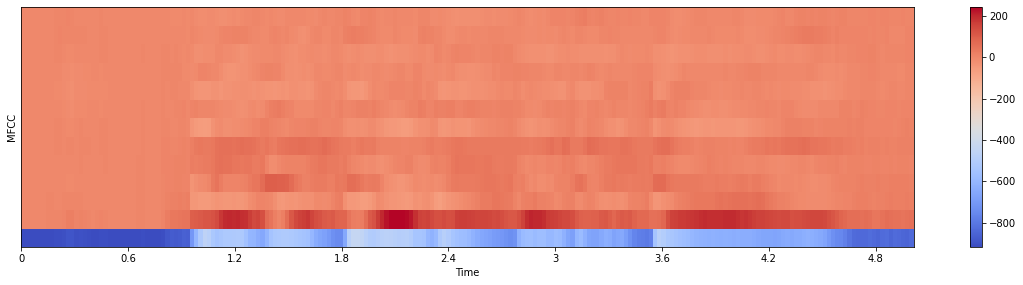

In [ ]:
path = "/content/drive/MyDrive/Projects/RAVDESS/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

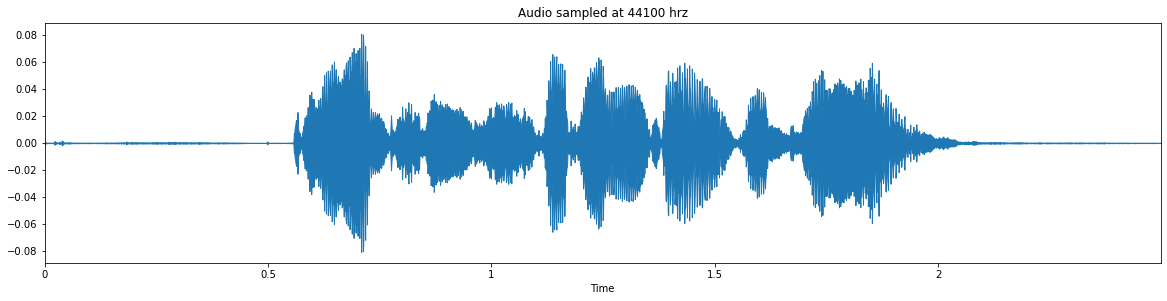

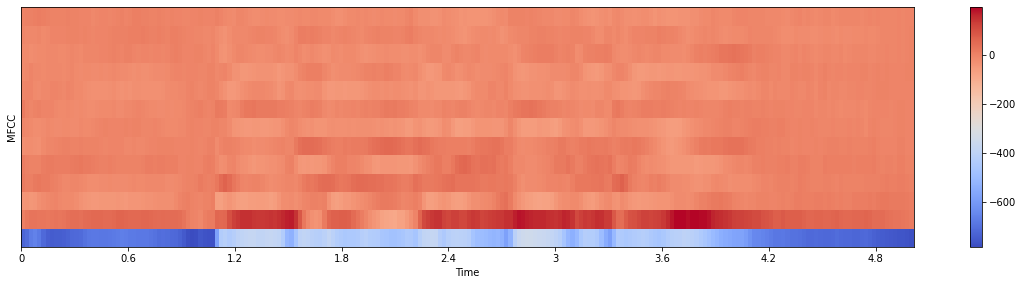

In [ ]:
path = "/content/drive/MyDrive/Projects/RAVDESS/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

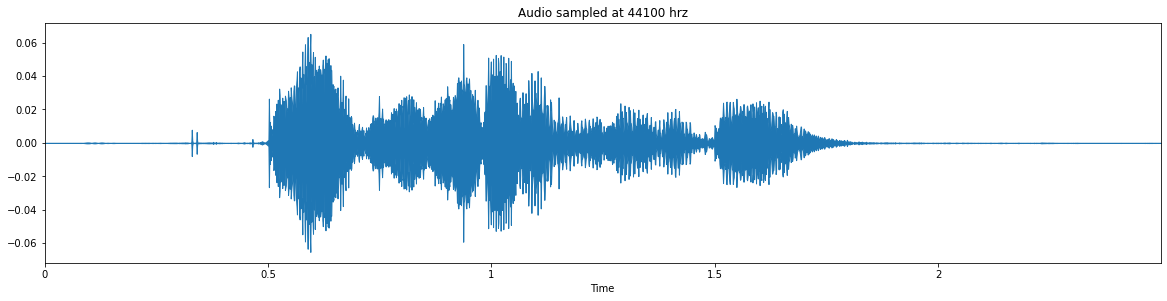

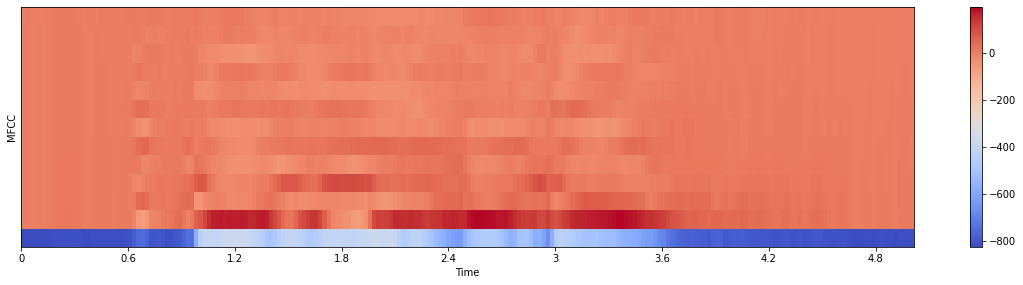

In [ ]:
path = "/content/drive/MyDrive/Projects/RAVDESS/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


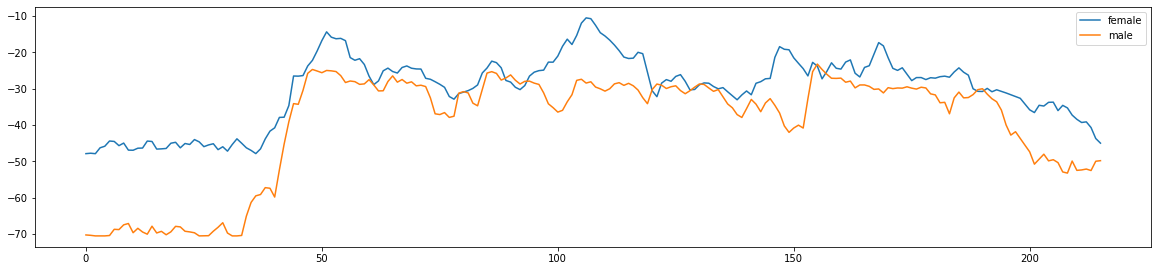

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/content/drive/MyDrive/Projects/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/content/drive/MyDrive/Projects/RAVDESS/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


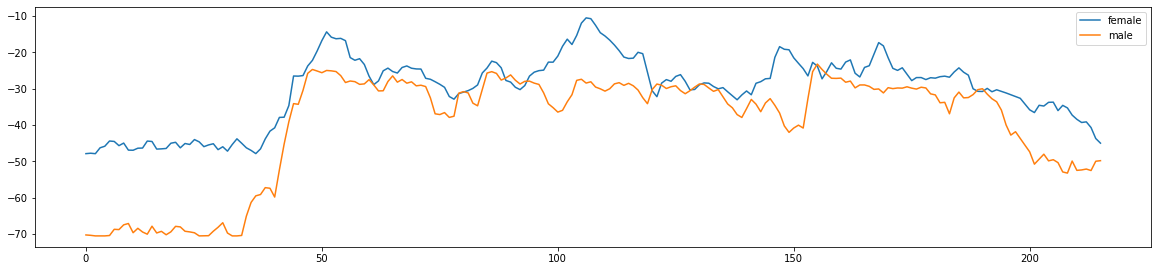

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/content/drive/MyDrive/Projects/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/content/drive/MyDrive/Projects/RAVDESS/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [ ]:
emotion_dic = {
                '01' : 'neutral', 
                '02' : 'calm' ,
                '03' : 'happy' ,
                '04' : 'sad' ,
                '05' : 'angry', 
                '06' : 'fearful' ,
                '07' : 'disgust', 
                '08' : 'surprised'
}

In [ ]:
our_emotion = ['neutral','happy','sad','angry','disgust','calm','fearful','surprised']

In [ ]:
from glob import glob

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
        X,sample_rate = librosa.load(file_name)
        if chroma:
            stft=np.abs(librosa.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [ ]:
audio_files = glob('/content/drive/MyDrive/Projects/RAVDESS'+'/*/*.wav')

In [ ]:
len(audio_files)

1440

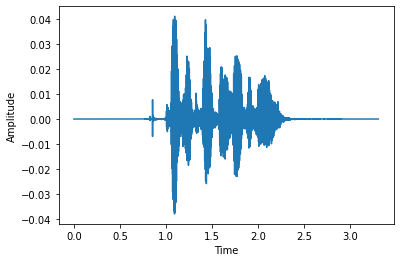

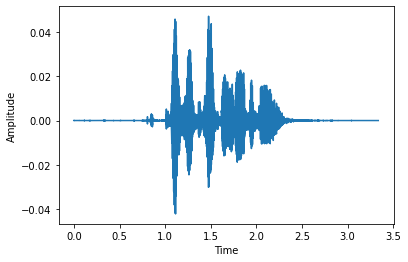

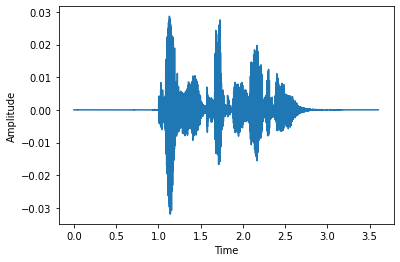

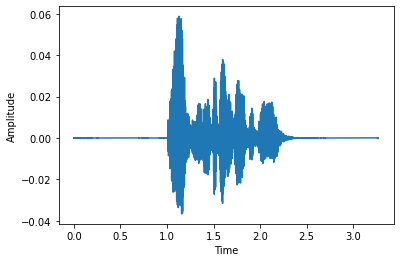

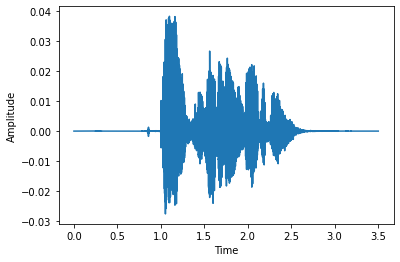

In [ ]:
for i in range(5):
    audio,sfreq = librosa.load(audio_files[i])
    time = np.arange(0,len(audio))/sfreq
    fig,ax = plt.subplots()
    ax.plot(time,audio)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

In [ ]:
x,y=[],[]
from IPython.display import clear_output
e = set()
for file in audio_files:
        clear_output(wait=True)
        file_name = file.split('/')[-1]
        emotion=emotion_dic[file_name.split("-")[2]]
        if emotion not in our_emotion:
            continue
        e.add(file.split('/')[-2])
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        print(e)
        x.append(feature)
        y.append(emotion)

{'Actor_07', 'Actor_24', 'Actor_01', 'Actor_10', 'Actor_18', 'Actor_03', 'Actor_05', 'Actor_20', 'Actor_17', 'Actor_21', 'Actor_13', 'Actor_08', 'Actor_19', 'Actor_23', 'Actor_14', 'Actor_04', 'Actor_22', 'Actor_15', 'Actor_11', 'Actor_02', 'Actor_06', 'Actor_12', 'Actor_09', 'Actor_16'}


In [ ]:
x = np.array(x)
x

array([[-6.97984192e+02,  5.52284889e+01,  3.23863208e-01, ...,
         4.05969922e-06,  1.71506167e-06,  1.24041847e-07],
       [-6.93069702e+02,  5.57345657e+01, -1.91973925e+00, ...,
         6.34954313e-06,  1.97894701e-06,  1.34178066e-07],
       [-7.07553467e+02,  6.70977325e+01,  1.90936518e+00, ...,
         5.86728856e-06,  1.70646388e-06,  1.34980240e-07],
       ...,
       [-5.32757446e+02,  3.81942062e+01, -1.54099045e+01, ...,
         5.10113838e-04,  1.36788512e-04,  1.67178405e-05],
       [-5.86762695e+02,  2.53723965e+01, -1.78241558e+01, ...,
         8.30615754e-05,  3.25424007e-05,  3.99248574e-06],
       [-5.18293823e+02,  3.00432606e+01, -4.41440105e+00, ...,
         1.32778881e-03,  3.60445760e-04,  2.78593816e-05]])

In [ ]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype='<U9')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
y

array([5, 5, 1, ..., 7, 7, 7])

In [ ]:
y = to_categorical(y)
print(y.shape)
print(y)

(1440, 8)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  =  MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,shuffle=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

In [ ]:
x = np.expand_dims(x,axis=2)

In [ ]:
x.shape

(1440, 180)

In [ ]:
model = Sequential()
model.add(Dense(128,input_shape=(180,1)))
model.add(Dense(256, activation= "relu"))
model.add(Dropout(0.25))
model.add(Dense(512, activation="tanh"))
model.add(Flatten())
#model.add(Dropout(0.20))
model.add(Dense(256))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.10))
model.add(Dense(40))
model.add(Flatten())
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 180, 128)          256       
                                                                 
 dense_22 (Dense)            (None, 180, 256)          33024     
                                                                 
 dropout_8 (Dropout)         (None, 180, 256)          0         
                                                                 
 dense_23 (Dense)            (None, 180, 512)          131584    
                                                                 
 flatten_5 (Flatten)         (None, 92160)             0         
                                                                 
 dense_24 (Dense)            (None, 256)               23593216  
                                                                 
 dense_25 (Dense)            (None, 128)              

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_cnn = model.fit(x_train,y_train,batch_size = 32,epochs=500,validation_data=(x_test,y_test))

Epoch 1/500
41/41 [==============================] - 3s 40ms/step - loss: 2.0666 - accuracy: 0.2014 - val_loss: 1.8445 - val_accuracy: 0.2569
Epoch 2/500
41/41 [==============================] - 1s 33ms/step - loss: 1.8956 - accuracy: 0.2731 - val_loss: 1.9714 - val_accuracy: 0.2153
Epoch 3/500
41/41 [==============================] - 1s 33ms/step - loss: 1.8346 - accuracy: 0.2917 - val_loss: 1.7298 - val_accuracy: 0.3264
Epoch 4/500
41/41 [==============================] - 1s 33ms/step - loss: 1.6947 - accuracy: 0.3549 - val_loss: 1.5436 - val_accuracy: 0.3750
Epoch 5/500
41/41 [==============================] - 1s 33ms/step - loss: 1.6164 - accuracy: 0.3819 - val_loss: 1.5066 - val_accuracy: 0.4236
Epoch 6/500
41/41 [==============================] - 1s 33ms/step - loss: 1.5494 - accuracy: 0.4012 - val_loss: 1.4536 - val_accuracy: 0.4653
Epoch 7/500
41/41 [==============================] - 1s 33ms/step - loss: 1.4689 - accuracy: 0.4383 - val_loss: 1.4137 - val_accuracy: 0.4653
Epoch 

In [ ]:
model.save('Speech-Emotion-Recognition_BEST_Model.h5')

In [ ]:
predictions = model.predict(x_test)

In [ ]:
acc_avg = np.mean(model_cnn.history['val_accuracy'])
acc_avg

0.6404722228944302

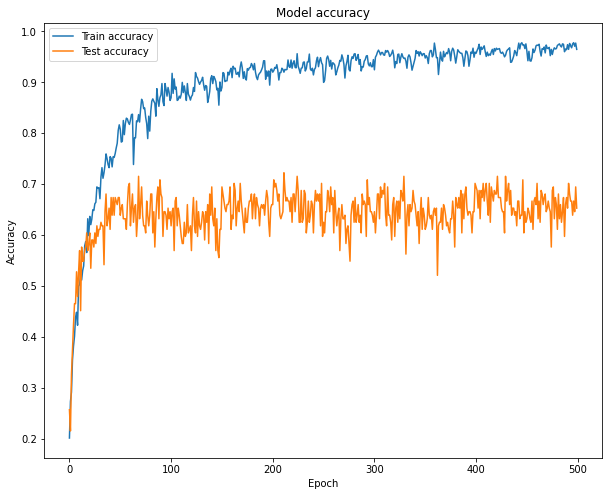

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(model_cnn.history['accuracy'])
plt.plot(model_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')
plt.show()

# **Testing Model**

In [ ]:
feature_test=extract_feature("/content/drive/MyDrive/Projects/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_base_ps.wav", mfcc=True, chroma=True, mel=True)

In [ ]:
feature_test.shape

In [ ]:
feature_test = np.expand_dims(feature_test,axis = 0)
feature_test

In [ ]:
output_test = model.predict(feature_test)

In [ ]:
output_test